In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv('../data/migraine.csv')
pd.set_option('display.float_format', '{:0.2f}'.format)

In [3]:
print(df.groupby('Type').size())

Type
Basilar-type aura                 18
Familial hemiplegic migraine      24
Migraine without aura             60
Other                             17
Sporadic hemiplegic migraine      14
Typical aura with migraine       247
Typical aura without migraine     20
dtype: int64


In [4]:
X = df.iloc[:, :-1].astype(np.float32)
y = df['Type']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

num_classes = 7

In [5]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(6), max_iter=50000, alpha=0.0001,
                     solver='adam',activation= 'logistic', random_state=25,
                     tol=0.0000001)   #neural nets classifier

mlp.fit(X_train, y_train)   #network training
y_pred = mlp.predict(X_test)  #prediction

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  #print classifier report

#Accuracy NN
from sklearn.metrics import accuracy_score
accuracy = accuracy_score (y_test, y_pred)
print("NN Accuracy = ", accuracy)

                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.20      0.33         5
 Familial hemiplegic migraine       0.57      0.80      0.67         5
        Migraine without aura       1.00      1.00      1.00        12
                        Other       1.00      1.00      1.00         3
 Sporadic hemiplegic migraine       0.75      1.00      0.86         3
   Typical aura with migraine       0.97      0.99      0.98        67
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.94       100
                    macro avg       0.90      0.86      0.83       100
                 weighted avg       0.95      0.94      0.93       100

NN Accuracy =  0.94


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Konwersja etykiet na format one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes)

In [7]:
print(y_train_encoded)
print(y_train_one_hot)

[2 5 5 5 1 5 5 0 5 4 0 5 3 2 2 1 5 5 2 5 2 5 0 5 5 5 0 5 6 0 2 2 6 5 5 5 5
 5 3 5 6 5 1 5 2 1 5 5 5 5 5 5 5 5 1 5 2 0 5 1 5 2 4 5 5 5 5 2 5 6 5 5 6 5
 5 5 1 6 5 5 2 5 5 5 3 1 1 5 5 2 5 5 5 5 1 5 2 4 5 2 5 6 3 5 5 3 2 5 5 5 5
 3 4 5 5 3 2 5 5 3 5 2 2 5 5 5 5 2 4 5 2 0 5 5 5 5 2 5 5 4 5 2 5 5 5 6 5 5
 5 5 6 6 5 5 2 4 4 2 5 3 4 5 5 5 2 2 2 2 5 5 5 5 1 0 5 5 5 2 5 5 5 5 5 2 2
 6 3 5 5 3 5 5 6 5 3 5 5 5 5 5 2 0 5 5 5 1 5 5 0 2 1 5 5 1 1 5 2 5 5 5 5 2
 1 5 1 5 2 5 5 5 2 5 2 5 5 6 5 5 5 5 5 3 5 1 4 5 2 5 5 5 5 5 5 5 5 5 2 5 5
 5 5 5 3 5 5 5 5 4 1 2 5 2 0 5 2 5 5 2 5 5 2 5 5 2 5 0 5 5 5 5 6 5 2 5 5 6
 0 5 5 5]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Warstwa ukryta z 64 neuronami i funkcją aktywacji ReLU
model.add(tf.keras.layers.Dense(32, activation='relu'))  # Kolejna warstwa ukryta z 32 neuronami i funkcją aktywacji ReLU
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))  # Warstwa wyjściowa z funkcją aktywacji softmax
model.build(input_shape=23)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,y_train_one_hot,epochs=50,verbose=1,validation_split=0.2)
tf.keras.models.save_model(model,'../models/softmax.keras')

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0718 - loss: 2.0530 - val_accuracy: 0.4667 - val_loss: 1.8702
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5053 - loss: 1.8475 - val_accuracy: 0.6833 - val_loss: 1.6874
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5704 - loss: 1.7100 - val_accuracy: 0.6667 - val_loss: 1.5317
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5848 - loss: 1.5841 - val_accuracy: 0.6667 - val_loss: 1.3966
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5932 - loss: 1.4712 - val_accuracy: 0.6667 - val_loss: 1.2851
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5776 - loss: 1.4053 - val_accuracy: 0.6667 - val_loss: 1.2033
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5447 - loss: 1.4013 - val_accuracy: 0.6667 - val_loss: 1.1485
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6006 - loss: 1.2473 - val_accuracy: 0.6667 - val_loss: 1.0997
Epoch 9

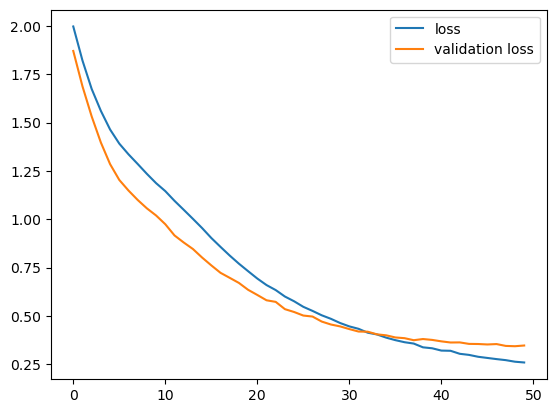

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])
plt.show()

In [11]:
model=tf.keras.models.load_model('../models/softmax.keras')
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f'Loss: {loss}, Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9415 - loss: 0.2386
Loss: 0.22977404296398163, Accuracy: 0.949999988079071


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#print(X[77]) #Typical aura with migraine
#print(X[222]) #Sporadic hemiplegic migraine
#print(X[377]) #Other
#print(x[325]) #Familial hemiplegic migraine

#Typical aura with migraine
#sample_features = np.array([27,2,1,1,1,3,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1, -1)
#Sporadic hemiplegic migraine
#sample_features = np.array([25,2,2,1,1,3,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0]).reshape(1, -1)
#Other
#sample_features = np.array([28,1,1,2,2,3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]).reshape(1, -1)


sample_features = np.array(X[325]).reshape(1, -1)


prediction = model.predict(sample_features)

# Wartości softmax dla każdej klasy
print("Predicted softmax probabilities:", prediction)

# Przewidywana klasa
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", predicted_class)
print('')

decoded_classes = label_encoder.inverse_transform(np.arange(len(label_encoder.classes_)))

print('')
rows = []
for class_name, prob in zip(decoded_classes, prediction[0]):
    print(f"Class: {class_name}, Probability: {prob:.2f}")

    row = {'Type': class_name, 'Probabilities': prob}
    rows.append(row)
print('')
predicted_classes = pd.DataFrame(rows)
print(predicted_classes.sort_values('Probabilities', ascending=False))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted softmax probabilities: [[2.4753708e-01 6.2822098e-01 3.9056502e-04 9.2400484e-02 3.0049736e-02
  7.2785752e-04 6.7337137e-04]]
Predicted class: [1]


Class: Basilar-type aura, Probability: 0.25
Class: Familial hemiplegic migraine, Probability: 0.63
Class: Migraine without aura, Probability: 0.00
Class: Other, Probability: 0.09
Class: Sporadic hemiplegic migraine, Probability: 0.03
Class: Typical aura with migraine, Probability: 0.00
Class: Typical aura without migraine, Probability: 0.00

                            Type  Probabilities
1   Familial hemiplegic migraine           0.63
0              Basilar-type aura           0.25
3                          Other           0.09
4   Sporadic hemiplegic migraine           0.03
5     Typical aura with migraine           0.00
6  Typical aura without migraine           0.00
2          Migraine without aura           0.00


In [13]:
mlp.predict(sample_features)

array(['Familial hemiplegic migraine'], dtype='<U29')